In [2]:
#load libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS

In [3]:
# Load Data
df = pd.read_pickle('kickstarter_analysis.pkl')

# Reindex to clean up columns into alphabetical order
df = df.reindex(sorted(df.columns), axis=1)

# Basic Information

In [139]:
df.head(3)

,blurb,blurb_len,category_core,category_name,country,created_at,currency,deadline,description,description_len,...,staff_pick,state,state_changed_at,static_usd_rate,usd_goal,usd_pledged,usd_rewards,vid_count,vid_usage,web_url
0,Ginger KICK! is back for the holidays with ama...,127.0,food,Small Batch,US,2017-11-05 12:05:03,USD,2017-11-12 20:33:24,"For those visiting for the first time, here's ...",4138.0,...,False,successful,2017-11-12 20:33:29,1.00000,50.000000,825.000000,"[1.0, 6.0, 12.0, 30.0, 50.0, 100.0]",0.0,False,https://www.kickstarter.com/projects/dackley-m...
1,Let's go to the movies on the L.A. River! Help...,133.0,film & video,Movie Theaters,US,2013-02-26 21:38:16,USD,2013-04-11 17:20:16,"The GoalWe need to raise $10,000 to cover prod...",1812.0,...,True,successful,2013-04-11 17:20:16,1.00000,10000.000000,10545.000000,"[10.0, 25.0, 50.0, 100.0, 250.0]",0.0,False,https://www.kickstarter.com/projects/860373786...
2,“Regret for the things we did can be tempered ...,130.0,film & video,Drama,GB,2019-02-11 09:31:54,GBP,2019-04-10 13:37:56,"“Life is too short, time is too precious, and ...",4948.0,...,False,successful,2019-04-10 13:37:56,1.32568,795.407844,796.733524,"[1.33, 6.63, 19.89, 26.51, 33.14, 39.77, 45.07...",0.0,False,https://www.kickstarter.com/projects/517894976...


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169751 entries, 0 to 169750
Data columns (total 30 columns):
blurb                        169749 non-null object
blurb_len                    169749 non-null float64
category_core                169751 non-null object
category_name                169751 non-null object
country                      169751 non-null object
created_at                   169751 non-null datetime64[ns]
currency                     169751 non-null object
deadline                     169751 non-null datetime64[ns]
description                  169750 non-null object
description_len              169750 non-null float64
img_count                    169751 non-null float64
launched_at                  169751 non-null datetime64[ns]
location_country             169545 non-null object
location_displayable_name    169545 non-null object
location_state               169499 non-null object
percent_goal                 169751 non-null float64
reach_goal                   

In [95]:
df.blurb.describe()

count                                                169749
unique                                               168618
top       Help support the largest creative collaboratio...
freq                                                     52
Name: blurb, dtype: object

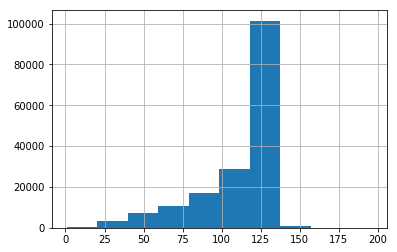

In [13]:
df.blurb_len.hist()

In [24]:
df['category_core'].value_counts()

music           24649
film & video    23995
art             18126
technology      17841
publishing      17098
food            13405
games           10775
fashion          8920
comics           6424
design           5885
photography      5719
crafts           5477
theater          4724
journalism       3706
dance            3007
Name: category_core, dtype: int64

In [25]:
df['country'].value_counts()

US    122779
GB     18031
CA      7707
AU      3854
DE      2642
FR      2039
IT      1828
MX      1725
ES      1467
NL      1448
SE      1084
NZ       765
DK       726
HK       669
CH       519
IE       501
SG       476
BE       441
NO       396
AT       372
JP       239
LU        43
Name: country, dtype: int64

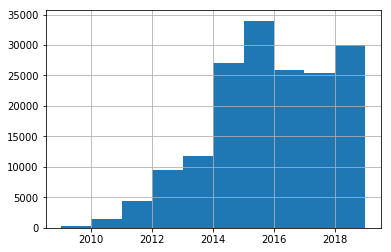

In [73]:
df.created_at.dt.year.hist()

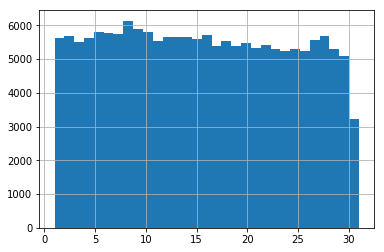

In [74]:
df.created_at.dt.day.hist(bins = 31)

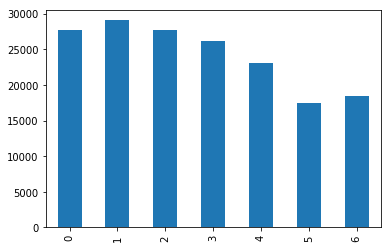

In [75]:
df.created_at.dt.weekday.value_counts(sort = False).plot.bar()

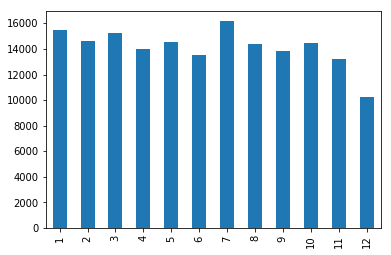

In [76]:
df.created_at.dt.month.value_counts(sort = False).plot.bar()

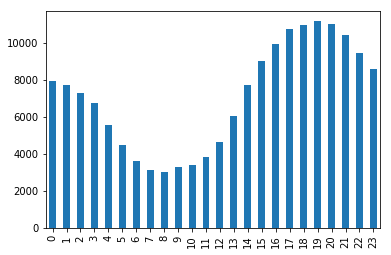

In [79]:
df.created_at.dt.hour.value_counts(sort = False).plot.bar()

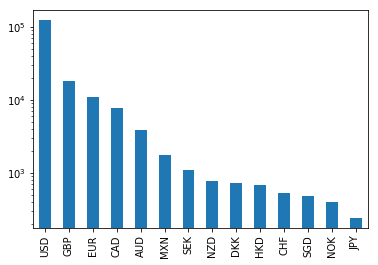

In [88]:
df.currency.value_counts().plot.bar(logy=True)

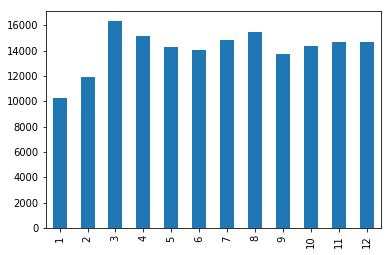

In [90]:
df.deadline.dt.month.value_counts(sort = False).plot.bar()

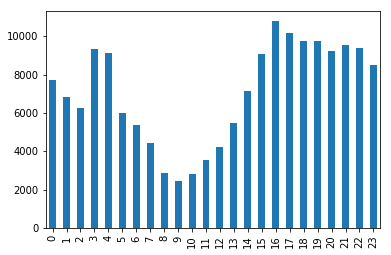

In [92]:
df.deadline.dt.hour.value_counts(sort = False).plot.bar()

In [93]:
df.description.describe()

count     169750
unique    167240
top             
freq         100
Name: description, dtype: object

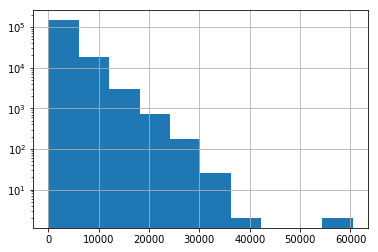

In [99]:
df.description_len.hist(log = True)

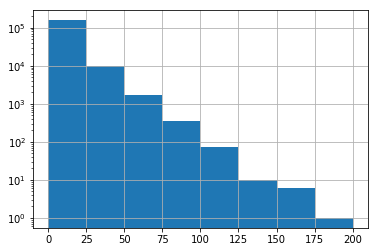

In [104]:
df.img_count.hist(log = True, bins = range(0,225,25))

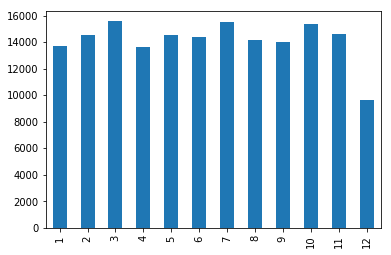

In [109]:
df.launched_at.dt.month.value_counts(sort = False).plot.bar()

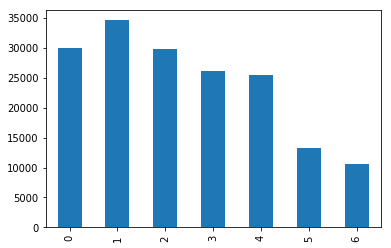

In [114]:
df.launched_at.dt.weekday.value_counts(sort = False).plot.bar()

In [120]:
df.location_country.nunique()

195

In [123]:
df.location_country.describe()

count     169545
unique       195
top           US
freq      118737
Name: location_country, dtype: object

In [128]:
df.location_country.value_counts().head(5)

US    118737
GB     17428
CA      7484
AU      3682
DE      2586
Name: location_country, dtype: int64

In [129]:
df.location_country.value_counts().tail(5)

DJ    1
LS    1
TJ    1
MO    1
LC    1
Name: location_country, dtype: int64

In [131]:
df.location_displayable_name.nunique()

14027

In [132]:
df.location_displayable_name.value_counts().head(5)

Los Angeles, CA      7998
New York, NY         6378
London, UK           6095
Chicago, IL          3212
San Francisco, CA    2768
Name: location_displayable_name, dtype: int64

In [143]:
df.location_state.value_counts().head(5)

CA         22273
England    15458
NY         14006
TX          7021
FL          5803
Name: location_state, dtype: int64

In [150]:
df[df['location_state']=='TX']['location_displayable_name'].nunique()

373

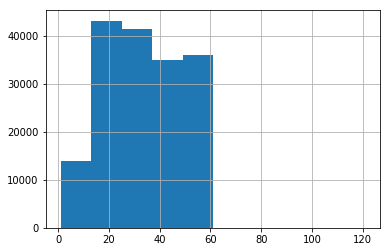

In [156]:
df.slug_len.hist()

In [164]:
df[df['slug_len'] >= 60]

,blurb,blurb_len,category_core,category_name,country,created_at,currency,deadline,description,description_len,...,staff_pick,state,state_changed_at,static_usd_rate,usd_goal,usd_pledged,usd_rewards,vid_count,vid_usage,web_url
27756,How is social change made in spaces where medi...,122.0,journalism,Journalism,US,2009-05-30 07:35:44,USD,2009-07-04 07:00:00,We operate best together. Working from this pr...,1189.0,...,False,successful,2009-07-04 07:00:34,1.0,1500.0,1500.0,"[1.0, 5.0, 10.0, 20.0, 30.0, 50.0, 100.0, 500....",0.0,False,https://www.kickstarter.com/projects/memeshift...


In [169]:
df.spotlight.value_counts()

True     95535
False    74216
Name: spotlight, dtype: int64

In [170]:
df.staff_pick.value_counts()

False    147980
True      21771
Name: staff_pick, dtype: int64

In [171]:
df.state.value_counts()

successful    95535
failed        74216
Name: state, dtype: int64

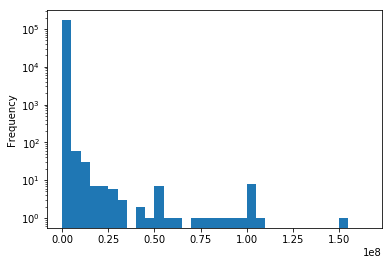

In [208]:
df.usd_goal.plot.hist(log = True, bins = range(0,170000000,5000000))

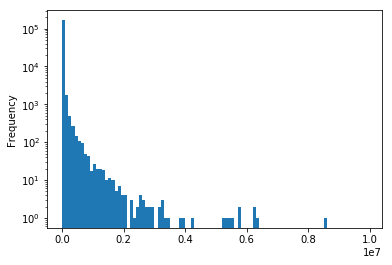

In [210]:
df.usd_pledged.plot.hist(log = True, bins = range(0, 10000000, 100000))

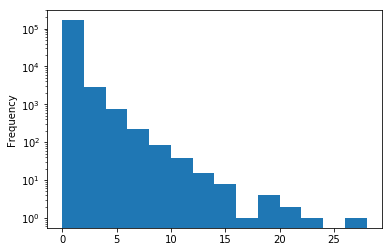

In [222]:
df.vid_count.plot.hist(log = True, bins = range(0, 30, 2))

In [223]:
df.vid_usage.value_counts()

False    158878
True      10873
Name: vid_usage, dtype: int64

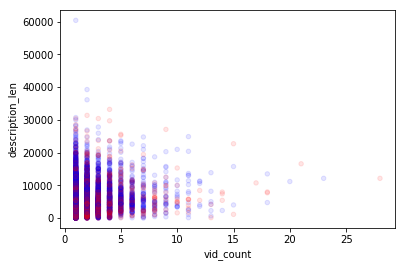

In [244]:
colors = {'failed':'red', 'successful':'blue'}

df[df['vid_usage'] == True].plot.scatter(x = 'vid_count', y = 'description_len', alpha = 0.1,
                                        c=df[df['vid_usage'] == True]['state'].apply(lambda x: colors[x]))

In [231]:
df[df['vid_count'] >= 20][['vid_count', 'description_len']]

,vid_count,description_len
31946,23.0,12132.0
53475,21.0,16571.0
90280,20.0,11156.0
158595,28.0,12131.0


In [233]:
df.loc[158595]['web_url']

'https://www.kickstarter.com/projects/simeontuitt/copy-my-connected-tuitt-smart-home-automation-diy'

In [5]:
## Reducing the number of variable names. Reducing the amount of times copy and pasting code. 
## Use loops
stopwords = set(STOPWORDS)

blurb_words = df.blurb.str.cat(sep=' ')
blurb_wc = WordCloud(stopwords = stopwords, background_color = 'white').generate(blurb_words)




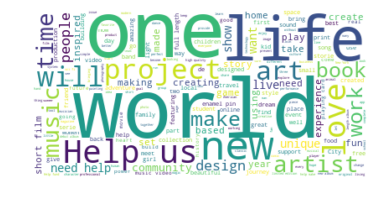

In [39]:
plt.imshow(blurb_wc, interpolation = 'bilinear')
plt.axis('off')
plt.savefig("img/blurb_wc.png", format="png", bbox_inches = 'tight', pad_inches = 0, dpi = 150)
plt.show()

In [61]:
df[(df.blurb.str.contains(' world ') == True)].loc[1333:168385]['blurb']

1333      I am a starving artist/photographer with a lot...
1355      AMASONG will take live concert recordings of o...
1364      Bloodline : The Animated Series -  Has a story...
1380      A universe of Alphas, Transcendents & its own ...
1388      Photos of the awesome world of off road racing...
1448      The third volume of Tavarsia, a fantasy comic ...
1463      Discover the world of wine through 80 harvests...
1479      A public ceremony for peace with 100+ dancers ...
1481      Apotheosis – Stories of human survival and def...
1483      Fire Cannon is the first Flashlight in the wor...
1488      CAULDRON: Sci-Fi Adventure set on a doomed wor...
1495      it's the wordless story of a few creatures int...
1511      Three days of the most bizarre, relentless, an...
1561      An innovative dance performance of 4 world pre...
1605      Reshaping the identity of corporate women. Hel...
1613      Dream Outside documents the creative expressio...
1645      The world is nothing but a can

In [65]:
df.loc[1511].blurb

'Three days of the most bizarre, relentless, and tragically misplaced films of all time - with both cult classics and world premieres.'

# Refresh of Story
Revamping the story we're telling.

In [15]:
df['state'].value_counts()

successful    95535
failed        74216
Name: state, dtype: int64

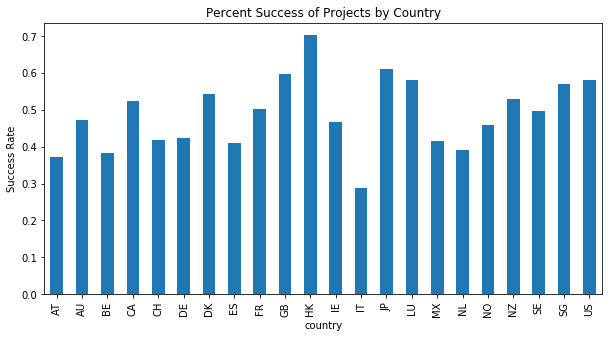

In [245]:
country_calc = df.groupby('country')['reach_goal'].agg(['sum','count'])

fig, ax = plt.subplots(figsize=(10, 5))

ax = (country_calc['sum'] / country_calc['count']).plot.bar()
ax.set_ylabel('Success Rate')
ax.set_title("Percent Success of Projects by Country")

fig.savefig('img/success_by_country', bbox_inches = 'tight')
## Right away, we see that success rate is the best in HK (Hong Kong) at 74.7% 
## with JP (Japan) trailing close behind at 67.7%. 
## The US is around 58% success rate. 
## IT (Italy) has the smallest success rate at 32.8%

In [361]:
## Reducing the number of variable names. Reducing the amount of times copy and pasting code. 
## Use loops
stopwords = set(STOPWORDS)

desc_dict = {}

for cc in df.category_core.unique():
    cc_words = df[df['category_core'] == cc]['description'].str.cat(sep = ' ')
    desc_dict[cc] = WordCloud(stopwords = stopwords, background_color = 'white').generate(cc_words)
    print("Completed: ", cc)

Completed:  food
Completed:  film & video
Completed:  publishing
Completed:  photography
Completed:  crafts
Completed:  music
Completed:  art
Completed:  fashion
Completed:  theater
Completed:  journalism
Completed:  technology
Completed:  games
Completed:  comics
Completed:  dance
Completed:  design


food  Wordcloud: 


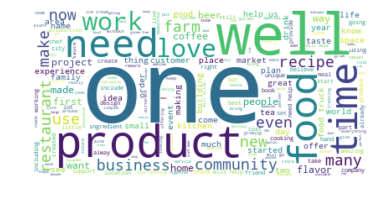

film & video  Wordcloud: 


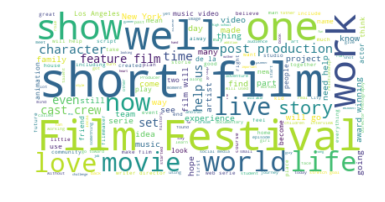

publishing  Wordcloud: 


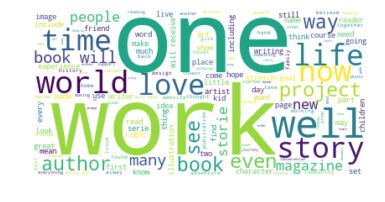

photography  Wordcloud: 


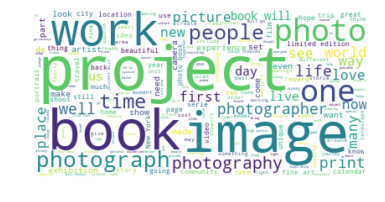

crafts  Wordcloud: 


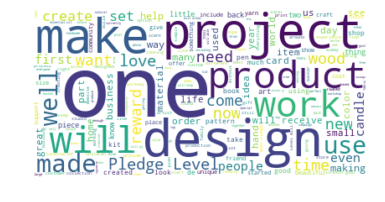

music  Wordcloud: 


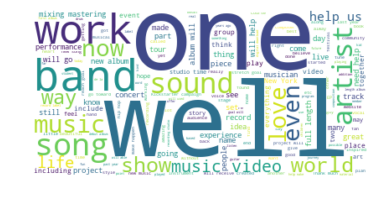

art  Wordcloud: 


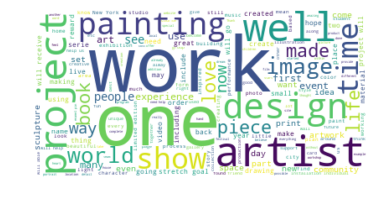

fashion  Wordcloud: 


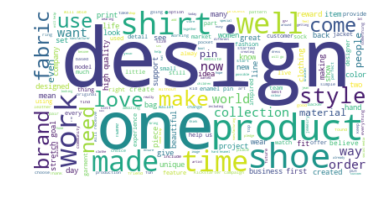

theater  Wordcloud: 


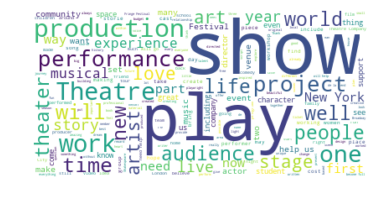

journalism  Wordcloud: 


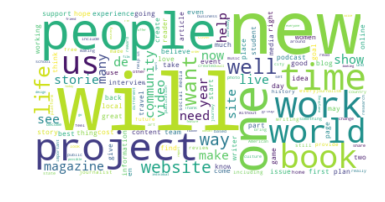

technology  Wordcloud: 


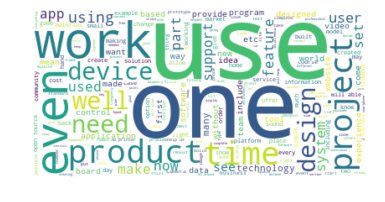

games  Wordcloud: 


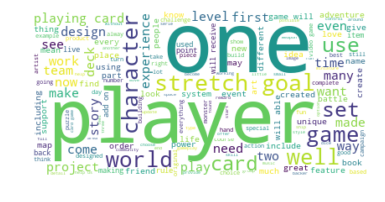

comics  Wordcloud: 


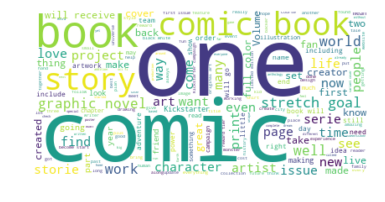

dance  Wordcloud: 


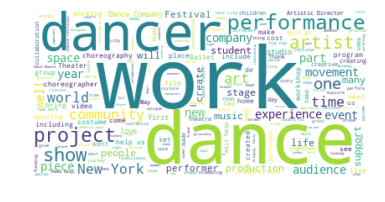

design  Wordcloud: 


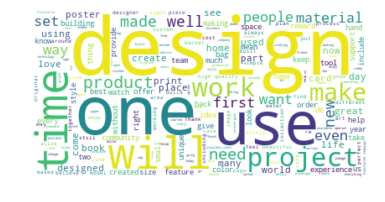

In [362]:
for cc in df.category_core.unique():
    print(cc, " Wordcloud: ")
    plt.imshow(desc_dict[cc], interpolation = 'bilinear')
    plt.axis('off')
    plt.savefig("img/wordcloud_"+cc+".png", format="png", bbox_inches = 'tight', pad_inches = 0, dpi = 150)
    plt.show()

In [363]:
df_min_1000 = df[df['usd_goal'] > 1000]
df_min_1000['percent_goal'] = df_min_1000.loc[:,'percent_goal'].round()

/Users/Matt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


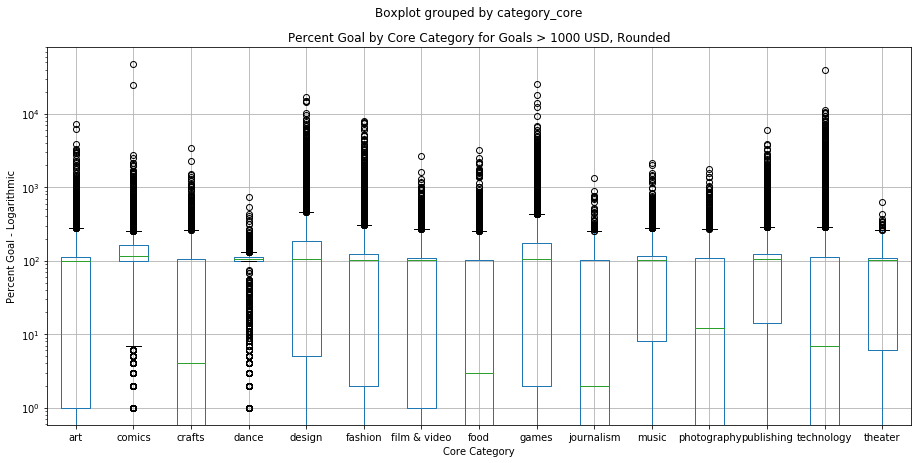

In [364]:
fig, ax = plt.subplots(figsize = (15, 7))

df_min_1000[['category_core', 'percent_goal']].boxplot(by = 'category_core', ax = ax)
ax.set_yscale('log')
ax.set_ylabel('Percent Goal - Logarithmic')
ax.set_xlabel('Core Category')
ax.set_title("Percent Goal by Core Category for Goals > 1000 USD, Rounded")
plt.show()
fig.savefig("img/Percent Goal by Category", bbox_inches='tight')

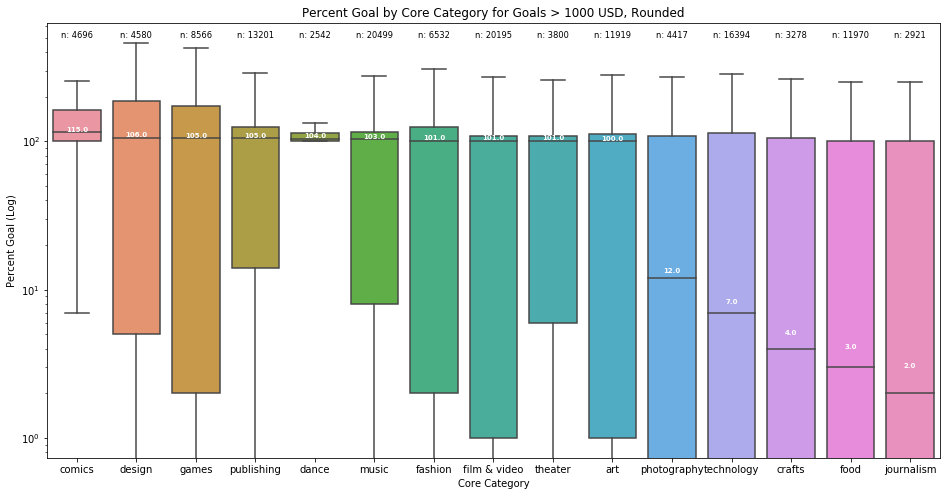

In [360]:
medians = df_min_1000.groupby(['category_core'])['percent_goal'].agg(['median','count']).sort_values(by = 'median', 
                                                                                           ascending = False)

fig, ax = plt.subplots(figsize = (16, 8))

sns.boxplot(x='category_core', y='percent_goal', data=df_min_1000, ax = ax,
           order = list(medians.index), showfliers = False)


pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], 10**2 + 400,"n: " + str(medians['count'][tick]),
            ha='center', size='small', color='k', weight='light')
    ax.text(pos[tick], medians['median'][tick]+1, medians['median'][tick],
           ha = 'center', size='x-small', color='w', weight='semibold')
    
ax.set_yscale('log')
ax.set_ylabel('Percent Goal (Log)')
ax.set_xlabel('Core Category')
ax.set_title("Percent Goal by Core Category for Goals > 1000 USD, Rounded")
    
plt.show()

fig.savefig("img/category_to_pgoal_sorted_ids", bbox_inches='tight')


In [100]:
df['deadline_date_month'] = df.deadline_date.dt.month

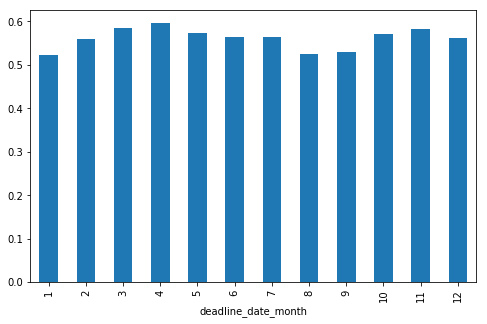

In [195]:
month_calc = df.groupby('deadline_date_month')['reach_goal'].agg(['sum','count'])

fig, ax = plt.subplots(figsize=(8, 5))

ax = (month_calc['sum'] / month_calc['count']).plot.bar()

plt.show()

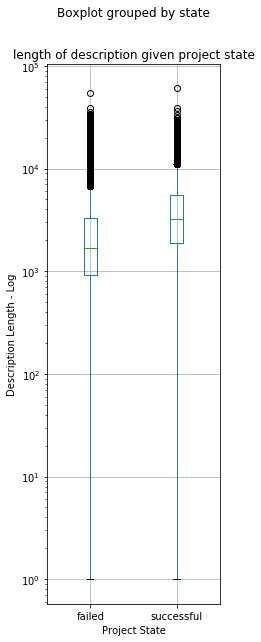

In [219]:
fig, ax = plt.subplots(figsize = (3, 10))

df_min_1000[['state', 'description_len']].boxplot(by = 'state', ax = ax)
ax.set_yscale('log')
ax.set_ylabel('Description Length - Log')
ax.set_xlabel('Project State')
ax.set_title("length of description given project state")
plt.show()
fig.savefig('State vs Desc Len', bbox_inches = 'tight')

In [123]:
df['deadline_date_month'] = df.deadline_date.dt.month
df['created_at_date_month'] = df.created_at_date.dt.month

calc1 = df.groupby('deadline_date_month')['reach_goal'].agg(['sum', 'count'])
calc2 = df.groupby('created_at_date_month')['reach_goal'].agg(['sum', 'count'])

calc1['percent'] = calc1['sum'] / calc1['count']
calc2['percent'] = calc2['sum'] / calc2['count']

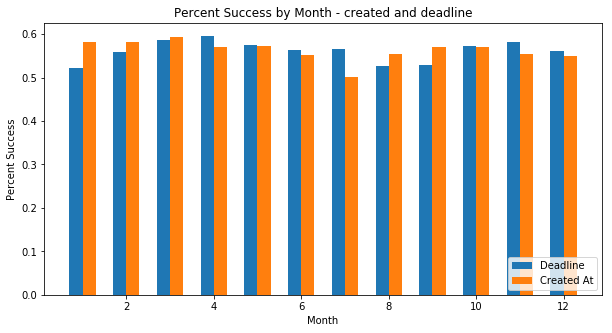

In [213]:
plt.figure(figsize=(10, 5))

bar_width = 0.3

plt.bar(calc1.index - bar_width/2, calc1.percent,bar_width,  label='Deadline')
plt.bar(calc2.index + bar_width/2, calc2.percent,bar_width, label='Created At')

plt.legend(loc=4)
plt.xlabel("Month")
plt.ylabel("Percent Success")
plt.title("Percent Success by Month - created and deadline")

plt.savefig("success by month on create vs deadline", bbox_inches = 'tight')

plt.show()


In [379]:
df['med_rewards'] = df.usd_rewards.apply(np.median)

/Users/Matt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


In [393]:
df['reward_len'] = df.usd_rewards.str.len()

In [404]:
df[df['reward_len'] == 0]['med_rewards']

24303    NaN
32124    NaN
41558    NaN
48634    NaN
51480    NaN
79060    NaN
82731    NaN
89596    NaN
91367    NaN
124143   NaN
128153   NaN
147566   NaN
147701   NaN
150032   NaN
158599   NaN
161375   NaN
166015   NaN
Name: med_rewards, dtype: float64

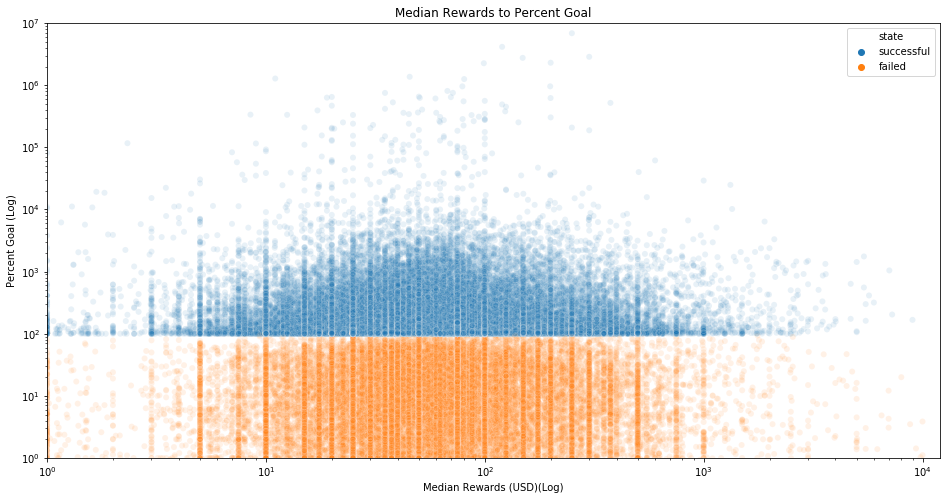

In [444]:
fig, ax = plt.subplots(figsize = (16, 8))

sns.scatterplot(x = 'med_rewards', y='percent_goal', data=df, ax=ax, alpha = 0.1, hue = 'state')
   
ax.set_yscale('log')
ax.set_ylim([1, 10**7])
ax.set_xscale('log')
ax.set_xlim([1, 12000])
ax.set_ylabel('Percent Goal (Log)')
ax.set_xlabel('Median Rewards (USD)(Log)')
ax.set_title("Median Rewards to Percent Goal")
    
plt.show()





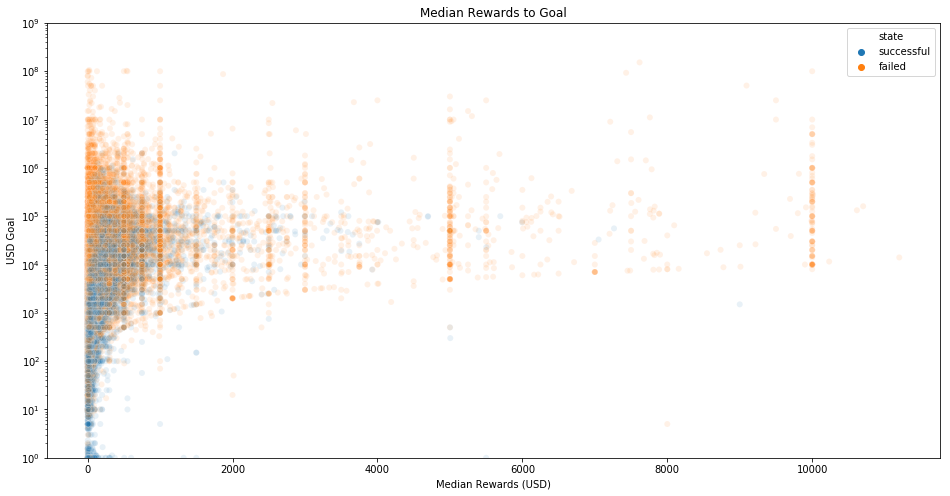

In [470]:
fig, ax = plt.subplots(figsize = (16, 8))

sns.scatterplot(x = 'med_rewards', y='usd_goal', data=df, ax=ax, alpha = 0.1, hue = 'state')
   
ax.set_yscale('log')
ax.set_ylim([1, 10**9])
#ax.set_xscale('log')
#ax.set_xlim([1, 10**5])
ax.set_ylabel('USD Goal')
ax.set_xlabel('Median Rewards (USD)')
ax.set_title("Median Rewards to Goal")

fig.savefig("img/med_reward_to_usd_goal", bbox_inches='tight')
    
plt.show()

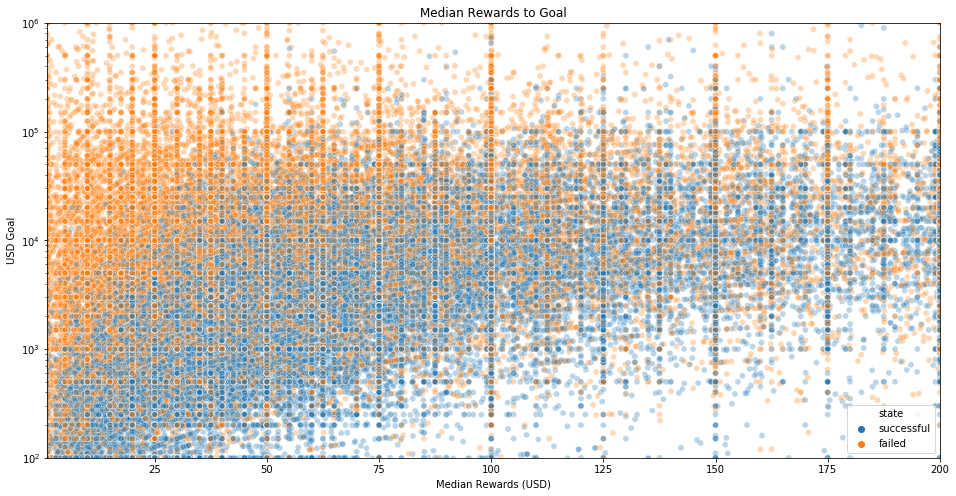

In [471]:
fig, ax = plt.subplots(figsize = (16, 8))

sns.scatterplot(x = 'med_rewards', y='usd_goal', data=df, ax=ax, alpha = 0.3, hue = 'state')
   
ax.set_yscale('log')
ax.set_ylim([10**2, 10**6])
#ax.set_xscale('log')
ax.set_xlim([1, 200])
ax.set_ylabel('USD Goal')
ax.set_xlabel('Median Rewards (USD)')
ax.set_title("Median Rewards to Goal")

fig.savefig("img/med_reward_to_usd_goal_zoomed", bbox_inches='tight')
    
plt.show()

In [1]:
fig, ax = plt.subplots(figsize = (16, 8))

sns.scatterplot(x = 'img_count', y='description_len', data=df, ax=ax, alpha = 0.3, hue = 'state')
   
ax.set_yscale('log')
ax.set_ylim([10**2, max(df.description_len)])
#ax.set_xscale('log')
ax.set_xlim([1, 100])
ax.set_ylabel('Description Len (Log)')
ax.set_xlabel('Image Count)')
ax.set_title("Image Count to Description Length by Project State")
    
plt.show()

NameError: name 'plt' is not defined

In [4]:
df.columns

Index(['blurb', 'blurb_len', 'category_core', 'category_name', 'country',
       'created_at', 'currency', 'deadline', 'description', 'description_len',
       'img_count', 'launched_at', 'location_country',
       'location_displayable_name', 'location_state', 'med_rewards',
       'percent_goal', 'reach_goal', 'reward_len', 'slug', 'slug_len',
       'spotlight', 'staff_pick', 'state', 'usd_goal', 'usd_pledged',
       'usd_rewards', 'vid_count', 'vid_usage', 'web_url'],
      dtype='object')

In [6]:
df.groupby(by='country').reach_goal.mean().sort_values()

country
IT    0.287199
AT    0.370968
BE    0.383220
NL    0.391575
ES    0.408998
MX    0.416232
CH    0.418112
DE    0.423164
NO    0.459596
IE    0.467066
AU    0.472237
SE    0.496310
FR    0.500736
CA    0.522382
NZ    0.528105
DK    0.542700
SG    0.569328
US    0.579716
LU    0.581395
GB    0.597637
JP    0.610879
HK    0.701046
Name: reach_goal, dtype: float64

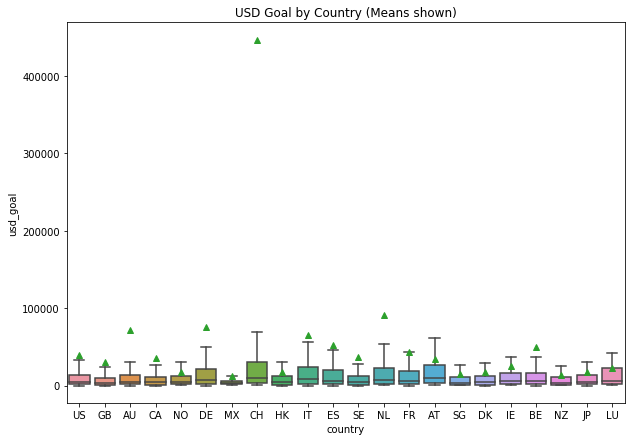

In [22]:
fig, ax = plt.subplots(figsize = (10, 7))

sns.boxplot(x = 'country', y='usd_goal', data = df, ax = ax, showfliers = False ,showmeans=True)
ax.set_title("USD Goal by Country (Means shown)")



## plt.savefig('img/country_usd_goal_boxplot.png')
plt.show()

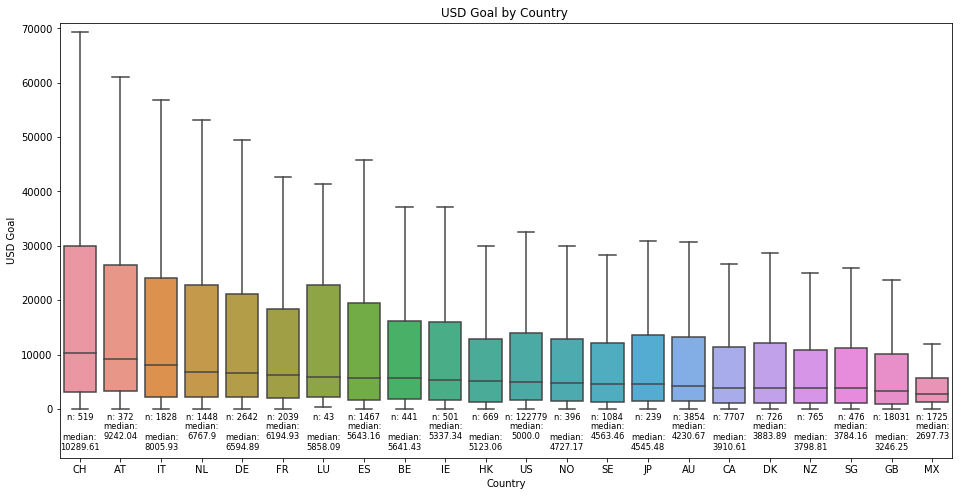

In [20]:
medians = df.groupby(['country'])['usd_goal'].agg(['median','count']).sort_values(by = 'median', 
                                                                                           ascending = False)

fig, ax = plt.subplots(figsize = (16, 8))
ax.set_ylim([-9000, 71000])
sns.boxplot(x='country', y='usd_goal', data=df, ax = ax,
           order = list(medians.index), showfliers = False)


pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], -2000,"n: " + str(medians['count'][tick]),
            ha='center', size='small', color='k', weight='light')
    ax.text(pos[tick], -7500+(tick%2 * 2000), 'median:\n'+str(round(medians['median'][tick],2)),
           ha = 'center', size='small', color='k', weight='light')

ax.set_ylabel('USD Goal')
ax.set_xlabel('Country')
ax.set_title("USD Goal by Country ")
    
plt.show()

fig.savefig("img/country_to_usd_goal_boxplot.png", bbox_inches='tight')




In [11]:
df.groupby(by='country').usd_goal.mean().sort_values()

country
MX     12836.151477
NZ     12995.593290
SG     14697.370273
HK     17514.391545
DK     17555.447855
NO     17907.134407
JP     18039.705722
LU     22699.678378
IE     25489.980947
GB     30145.943450
AT     34867.616879
CA     35773.378265
SE     36785.340601
US     39388.299063
FR     43791.369281
BE     50232.923054
ES     52535.607835
IT     65552.643104
AU     72123.880541
DE     75506.563795
NL     90945.315623
CH    447286.868807
Name: usd_goal, dtype: float64